In [47]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

df = pd.read_csv("Z:\HY_FA Returns_RawData2.csv")


In [48]:
print df.head()


         Date      HY_OAS      HY_WARF  HY_ M_ ER  HY_ Trl_ 12M_ ER  \
0   6/30/1997  234.191194  2511.954598   0.058436          1.125060   
1   7/31/1997  238.945036  2545.137267   0.625331         -7.875162   
2   8/29/1997  238.492443  2546.640588   0.570790        -11.062994   
3   9/30/1997  229.248058  2566.289024  -1.389888        -11.505770   
4  10/31/1997  234.578430  2547.356658   0.644467         -7.850148   

       FA_OAS      FA_WARF  FA_M_ ER  FA_Trl_ 12M_ ER   ER_DIFF  
0   98.434389  1351.702971 -0.090524         1.022413 -0.102647  
1  108.417683  1133.408090  0.343662        -4.799652  3.075509  
2   99.110148  1102.027493  0.106530        -5.212333  5.850661  
3  113.476066  1097.996259 -1.105227        -6.800029  4.705741  
4  110.344762  1119.201237 -0.049076        -4.357495  3.492653  


In [49]:
for x in df.columns.values:
    print x

Date
HY_OAS
HY_WARF
HY_ M_ ER
HY_ Trl_ 12M_ ER
FA_OAS
FA_WARF
FA_M_ ER
FA_Trl_ 12M_ ER
ER_DIFF


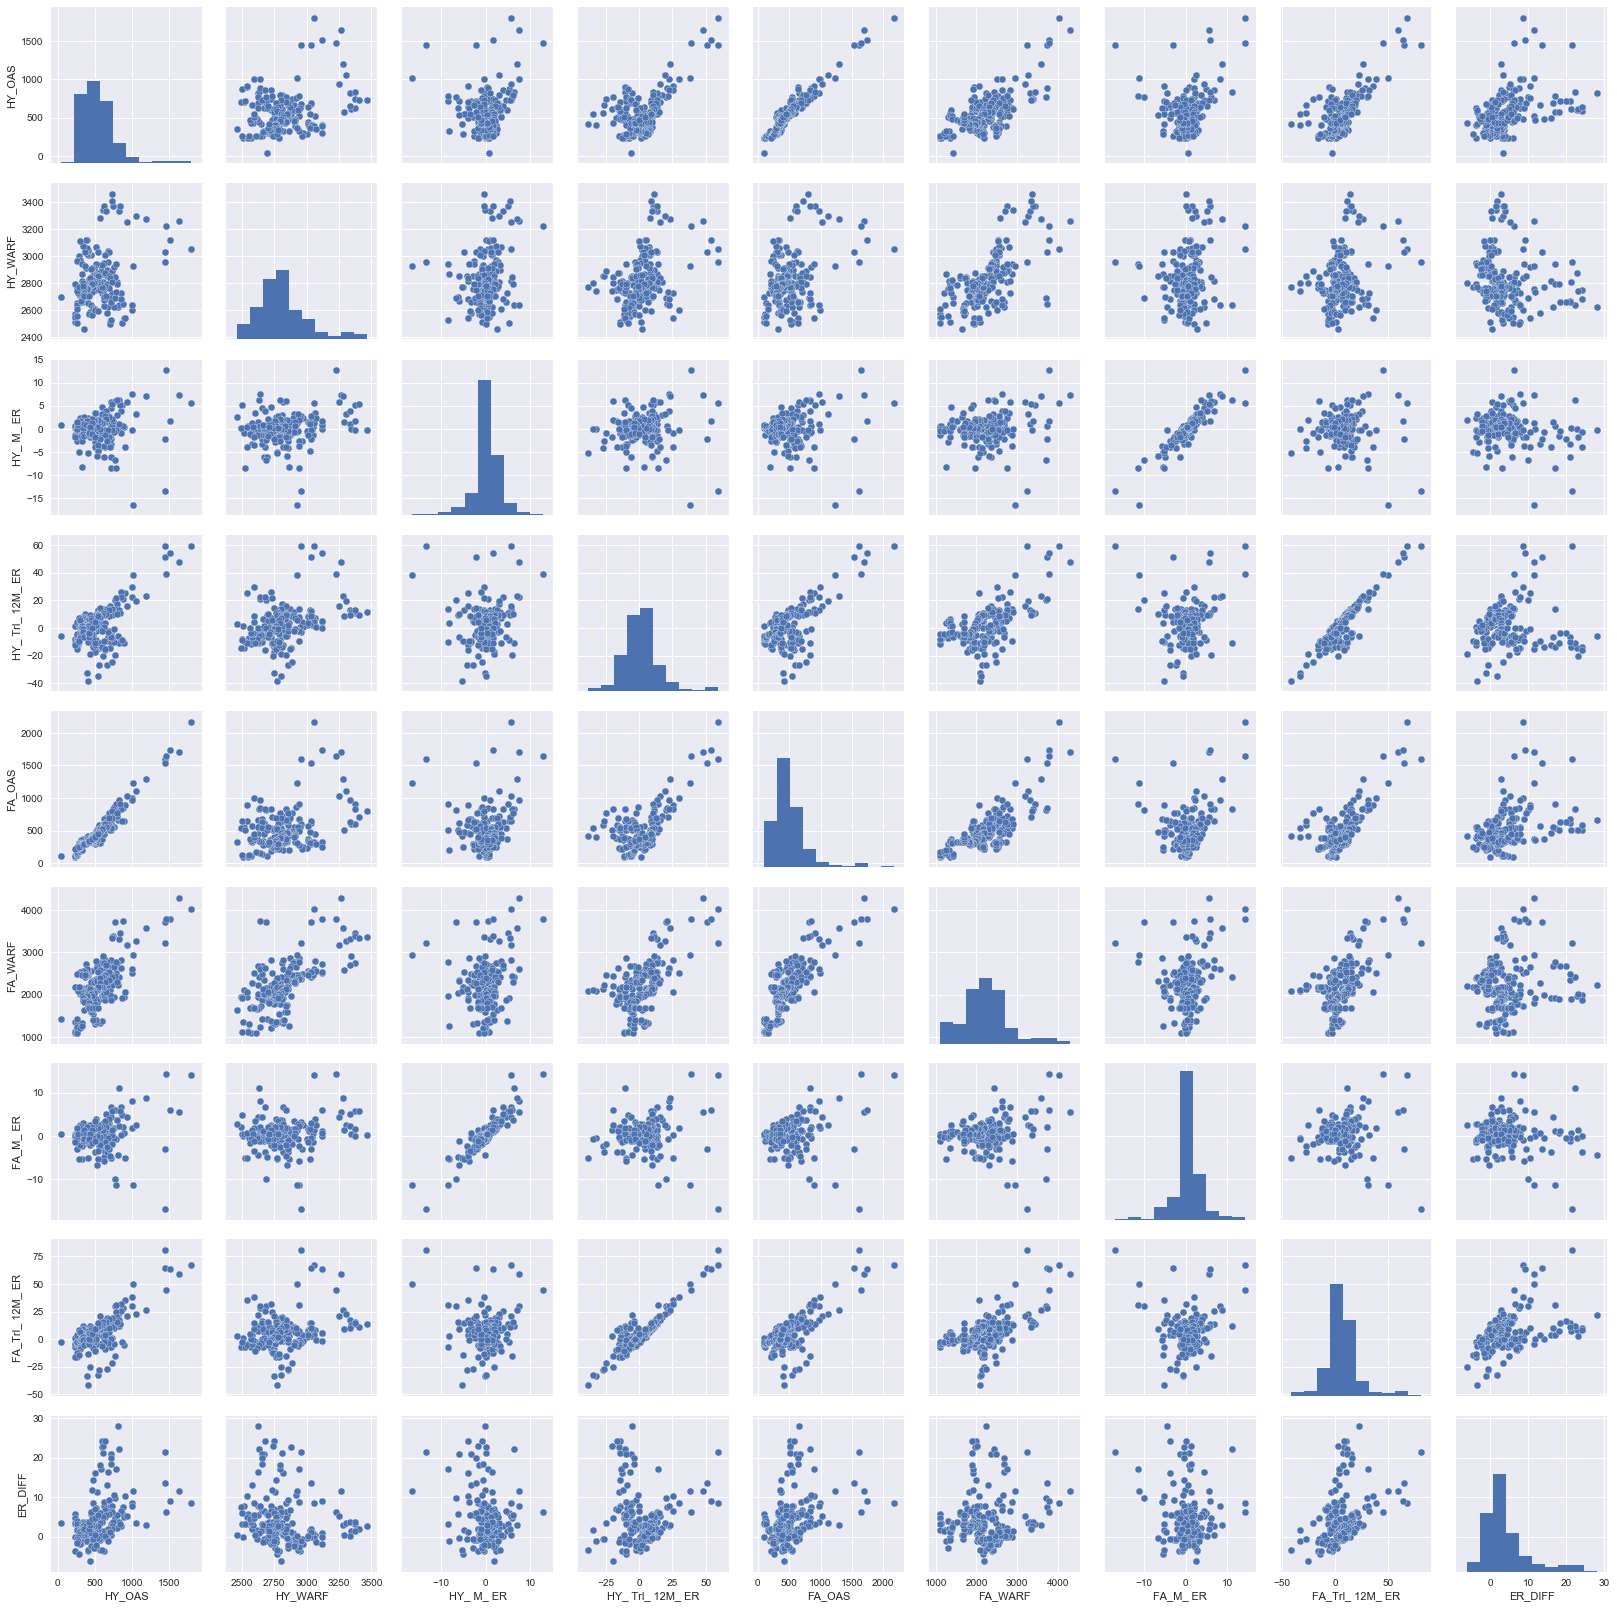

In [50]:
%matplotlib inline
sns.pairplot(df)

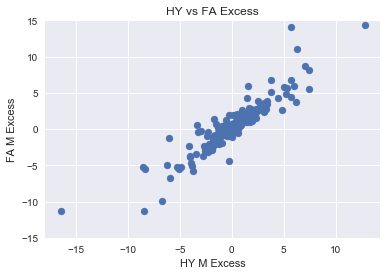

In [54]:
plt.scatter(df["HY_ M_ ER"], df["FA_M_ ER"])
plt.xlabel("HY M Excess")
plt.ylabel("FA M Excess")
plt.ylim(-15, 15)
plt.title("HY vs FA Excess")
plt.show()

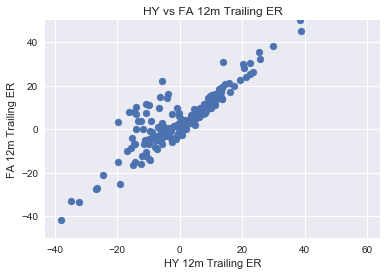

In [55]:
plt.scatter(df["HY_ Trl_ 12M_ ER"], df["FA_Trl_ 12M_ ER"])
plt.xlabel("HY 12m Trailing ER")
plt.ylabel("FA 12m Trailing ER")
plt.ylim(-50, 50)
plt.title("HY vs FA 12m Trailing ER")
plt.show()

ValueError: invalid literal for float(): 8/31/2015

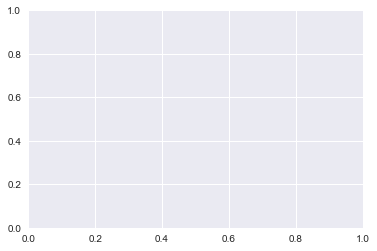

In [65]:

import datetime
plt.plot(df["Date"], df["HY_ M_ ER"], label="US HY M Excess Return")
plt.plot(df["Date"], df["FA_M_ ER"], label="Fallen M Excess Return")
plt.xlabel("Date")
plt.ylabel("Excess Return")
plt.title("Montly Excess Returns")
plt.legend()
plt.show()

In [71]:
df.date



AttributeError: 'DataFrame' object has no attribute 'date'

In [64]:
import datetime


In [41]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='US HY M Excess Return ~ Fallen M Excess Return', data=data).fit()

#print the full summary
lm.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [73]:

import statsmodels.formula.api as smf

X = df[['HY_ M_ ER']]
y = df['FA_M_ ER']


lm = smf.ols(formula='y ~ X', data=HY_FA).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1176.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           1.40e-89
Time:                        15:59:02   Log-Likelihood:                -370.68
No. Observations:                 219   AIC:                             745.4
Df Residuals:                     217   BIC:                             752.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3121      0.089      3.494      0.001         0.136     0.488
X              0.9978      0.029     34.298      0.000         0.940     1.055
==============================================================================
Omnibus:                      100.395   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.873
Skew:                           1.577   Prob(JB):                    1.36e-171
Kurtosis:                      11.734   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""